# *Model Validation*

It is the process of determining the degree to which the model corresponds to the real system referred.

It represents how your model acts to the real world data and helps in determining how good the model is trained.

## ***The steps involved in model selection are stated below:***

1) Reserve a sample data set.

2) Train the model using the remaining part of the dataset.

3) Use the reserve sample of the test (validation) set to test the effectiveness of your model’s performance.

Let's import some important libraries

In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This notebook is based on the **'Red Wine Quality dataset'** which contanis only physicochemical (inputs) and sensory (the output) data for red wine.

### **Input variables (based on physicochemical tests):**

1) fixed acidity

2) volatile acidity

3) citric acid

4) residual sugar

5) chlorides

6) free sulfur dioxide

7) total sulfur dioxide

8) density

9) pH

10) sulphates

11) alcohol

### **Output variable (based on sensory data):**

1) quality (score between 0 and 10)

In [2]:
wine = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
qual = wine.quality.unique()
qual.sort()
qual

array([3, 4, 5, 6, 7, 8])

Now, since the quality varies from 3 to 8, let's map these quantities in range 0 to 5 for better predictions.

In [6]:
wine_quality_map = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

wine.quality = wine.quality.map(wine_quality_map)

In [7]:
qual_map = wine.quality.unique()
qual_map.sort()
qual_map

array([0, 1, 2, 3, 4, 5])

### **Simple model selection technique**

For simple model selection technique I have divided the data(that contains 1599 entries) into train and test set.

In the Train set contain first 1000 entries and test set contain last 599 entries.

We will train the model on first 1000 entries and check the model by predicting and comparing with test set.

In [8]:
wine_train = wine.head(1000)
wine_train_label = wine_train['quality']
wine_train = wine_train.drop('quality', axis = 1)

In [9]:
wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
wine_test = wine.tail(599)
wine_test_label = wine_test['quality']
wine_test = wine_test.drop('quality', axis = 1)

In [11]:
wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1000,7.5,0.43,0.30,2.20,0.062,6.0,12.0,0.99495,3.44,0.72,11.5
1001,9.9,0.35,0.38,1.50,0.058,31.0,47.0,0.99676,3.26,0.82,10.6
1002,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
1003,6.8,0.36,0.32,1.80,0.067,4.0,8.0,0.99280,3.36,0.55,12.8
1004,8.2,0.43,0.29,1.60,0.081,27.0,45.0,0.99603,3.25,0.54,10.3


Now we will only use the DecisionTreeClassifier to show how the model accuracy varies with respect to different model validation methods.

In [12]:
train_accuracy = [0.5]
test_accuracy = [0.5]

for depth in range(1, 20):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    clf.fit(wine_train, wine_train_label)
    
    train_pred = clf.predict(wine_train)
    acc_train = metrics.accuracy_score(wine_train_label, train_pred)
    
    test_pred = clf.predict(wine_test)
    acc_test = metrics.accuracy_score(wine_test_label, test_pred)
    
    train_accuracy.append(acc_train)
    test_accuracy.append(acc_test)

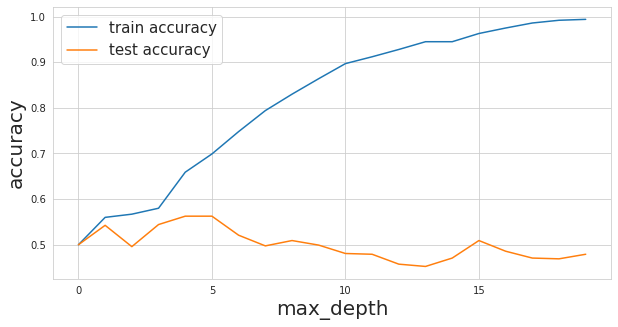

In [13]:
plt.figure(figsize = (10, 5))
sns.set_style('whitegrid')
plt.plot(train_accuracy, label = 'train accuracy')
plt.plot(test_accuracy, label = 'test accuracy')
plt.legend(loc = 'upper left', prop = {'size': 15})
plt.xticks(range(0, 20, 5))
plt.xlabel('max_depth', size = 20)
plt.ylabel('accuracy', size = 20)
plt.show()

#### **Insight:**

From the graph plotted above it is quite clear that the model fails in predicting most real world data accurately, with the highest accuracy of approx 0.57 at the max depth of 5.

The model overfits as the train accuracy is much higher than the test accuracy.

### **Cross Validation:**

Cross validation is a technique in the process of building any machine learning model which ensures that the model fits the data accurately and doesn't overfit the data.

In this notebook we will only look at K-Fold cross validation and stratified K-Fold cross validation.

### **K-Fold Cross Validation:**

It involves random k-Fold Cross Validation dividing the set of observations into k groups, or Folds of approximately equal size.

The first fold is treated as a validation set, and the machine learing model is fit on the remaining (k-1) Folds.

This procedure is repeated for (k) times. Each time, a different group of observations is treated as a validation set.

In [14]:
# Let's Apply K-Fold Cross Validation

# For this create a new column K-Fold with entry -1
wine['kFold'] = -1

# Shuffle the Data
wine = wine.sample(frac = 1).reset_index(drop = True)

# Split the data into 4 Folds
kfolds= model_selection.KFold(n_splits = 5)
for fold, (t, v)in enumerate(kfolds.split(X = wine)):
    wine.loc[v, 'kFold'] = fold
    
# Saving the data for further use
wine.to_csv('k_fold.csv', index = False)

First we will see the accuracy by taking different training and validation sets and its accuracy with the increasing depth of decision tree.

In [15]:
def check(fold):
    dt = pd.read_csv('./k_fold.csv')
    dt_train = dt[dt.kFold != fold].reset_index(drop = True)
    dt_test = dt[dt.kFold == fold].reset_index(drop = True)  
    
    y_train = dt_train.quality.values
    x_train = dt_train.drop('quality', axis = 1).values
    
    y_valid = dt_test.quality.values
    x_valid = dt_test.drop('quality', axis = 1).values
    
    ktrain_acc = [0.5]
    ktest_acc = [0.5]
    for depth in range(1, 20):
        clf = tree.DecisionTreeClassifier(max_depth = depth)

        clf.fit(x_train, y_train)

        train_pred = clf.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, train_pred)

        test_pred = clf.predict(x_valid)
        acc_test = metrics.accuracy_score(y_valid, test_pred)

        ktrain_acc.append(acc_train)
        ktest_acc.append(acc_test)
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    plt.plot(ktrain_acc, label = 'train accuracy')
    plt.plot(ktest_acc, label = 'test accuracy')
    plt.legend(loc='upper left', prop = {'size': 15})
    plt.xticks(range(0, 20, 5))
    plt.xlabel('max_depth', size = 20)
    plt.ylabel('accuracy', size = 20)
    plt.show()

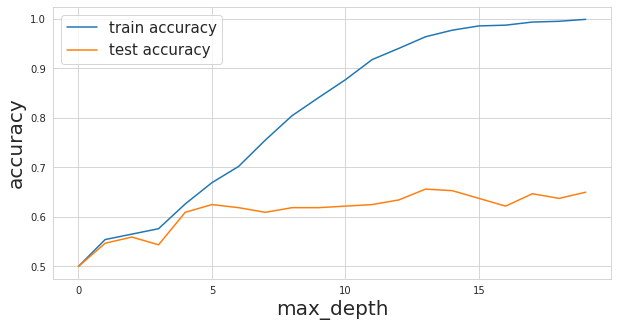

In [16]:
# Taking fold 0 as test set and rest as training set
check(fold = 0)

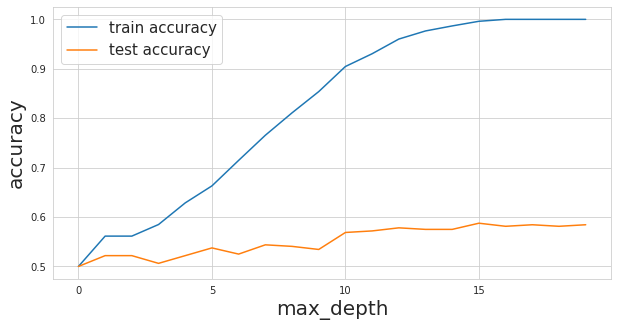

In [17]:
# Taking fold 1 as test set and rest as training set
check(fold = 1)

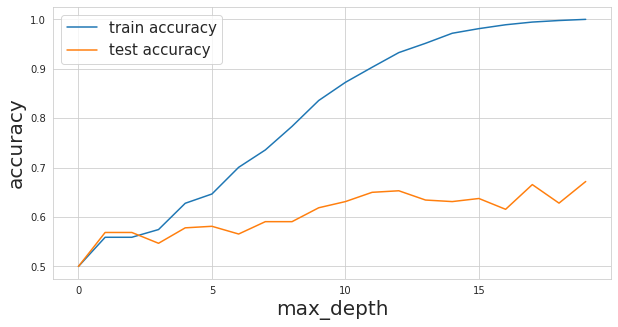

In [18]:
# Taking fold 2 as test set and rest as training set
check(fold = 2)

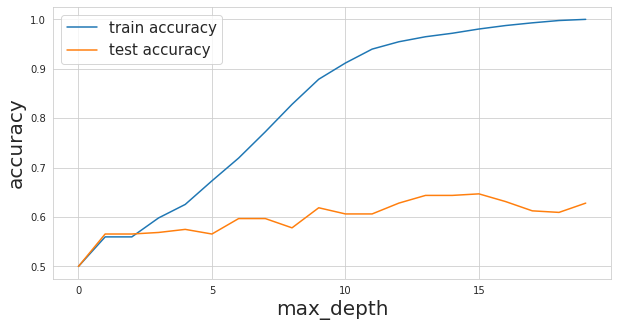

In [19]:
# Taking fold 3 as test set and rest as training set
check(fold = 3)

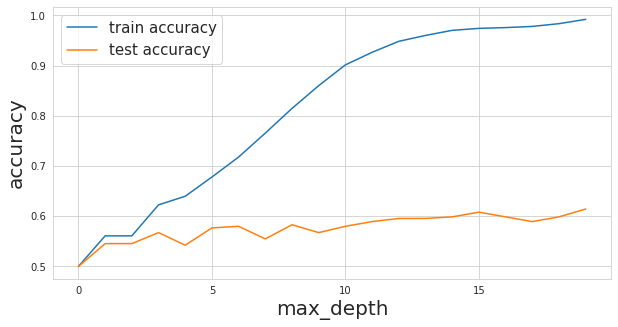

In [20]:
#Taking fold 4 as test set and rest as training set
check(fold = 4)

The performance measure reported by k-Fold Cross Validation is then the average of the values computed in the loop. The code below shows the result at the max depth of 12 and the accuracy is at differnt folds taken one at a time and the the average is calculated.

In [21]:
X = pd.read_csv('./k_fold.csv')
y = X.quality.values
X = X.drop('quality', axis = 1).values
clf = tree.DecisionTreeClassifier(max_depth = 25)
scores = model_selection.cross_val_score(clf, X, y, cv = 4)
print(scores)

[0.58       0.56       0.6175     0.59899749]


In [22]:
# Calculating the average
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.04)


<AxesSubplot:xlabel='quality', ylabel='count'>

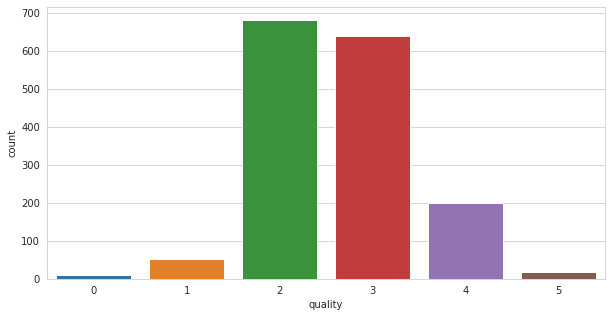

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x = wine['quality'])

### Stratified K-Fold Cross Validation:

From the Graph above it is quite clear that the data is skewed for a classification problem as there is very less data availble for the wine with quality index 0.

Wine with quality index 1 and 5 also have a little sample, while the wine with quality index 2 and 3 have a huge amount of samples availble. 

For this classification purpose, simple k-Fold validation doesn't produced good results. So we move to another cross validation technique called stratified K-Fold cross validation.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [24]:
# Applying stratified k-Fold Cross validation
y_data = wine.quality.values
kf = model_selection.StratifiedKFold(n_splits = 5)

for fold, (t, v) in enumerate(kf.split(X = wine, y = y_data)):
    wine.loc[v, 'kfold'] = fold

wine.to_csv('st_fold.csv', index = False)

In [25]:
def check_stratified(fold):
    st = pd.read_csv('./st_fold.csv')
    st_train = st[st.kFold != fold].reset_index(drop = True)
    st_test = st[st.kFold == fold].reset_index(drop = True)  
    
    y_train = st_train.quality.values
    x_train = st_train.drop('quality', axis = 1).values
    
    y_valid = st_test.quality.values
    x_valid = st_test.drop('quality', axis = 1).values
    
    sktrain_acc = [0.5]
    sktest_acc = [0.5]
    for depth in range(1, 20):
        clf = tree.DecisionTreeClassifier(max_depth = depth)

        clf.fit(x_train, y_train)

        train_pred = clf.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, train_pred)

        test_pred = clf.predict(x_valid)
        acc_test = metrics.accuracy_score(y_valid, test_pred)

        sktrain_acc.append(acc_train)
        sktest_acc.append(acc_test)
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    plt.plot(sktrain_acc, label = 'train accuracy')
    plt.plot(sktest_acc, label = 'test accuracy')
    plt.legend(loc='upper left', prop = {'size': 15})
    plt.xticks(range(0, 20, 5))
    plt.xlabel('max_depth', size = 20)
    plt.ylabel('accuracy', size = 20)

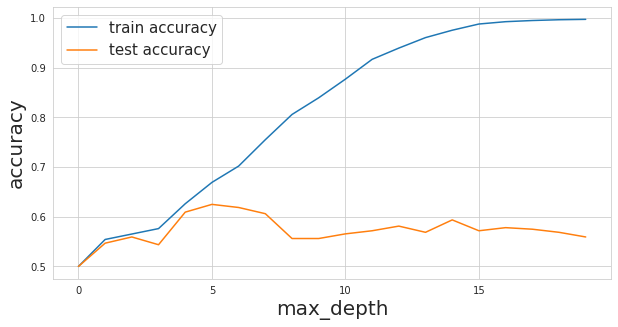

In [26]:
# Taking fold 0 as test set and rest as training set
check_stratified(fold = 0)

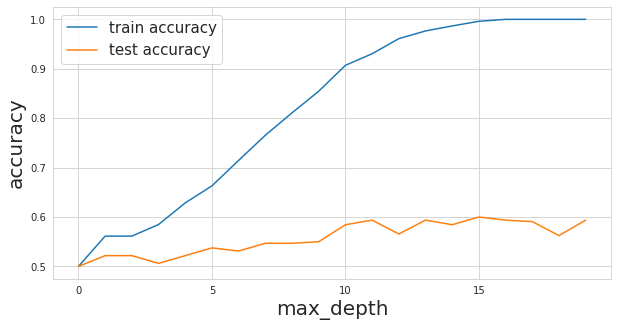

In [27]:
# aking fold 1 as test set and rest as training set
check_stratified(fold = 1)

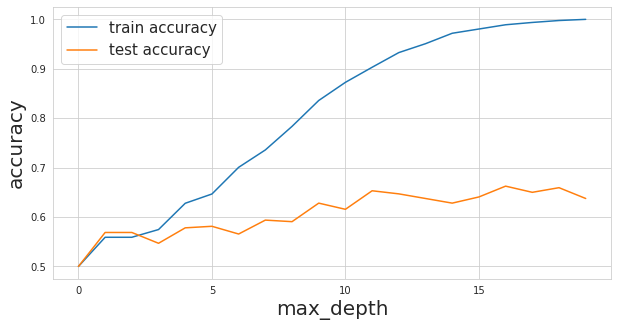

In [28]:
# Taking fold 2 as test set and rest as training set
check_stratified(fold = 2)

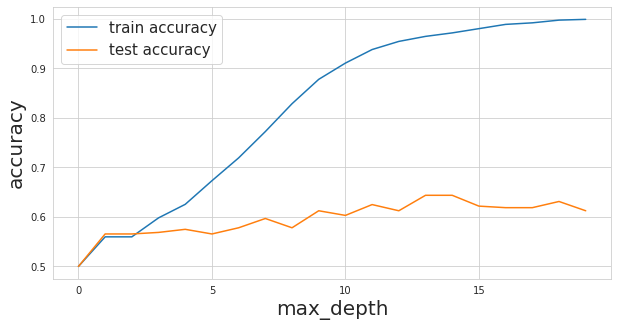

In [29]:
# Taking fold 3 as test set and rest as training set
check_stratified(fold = 3)

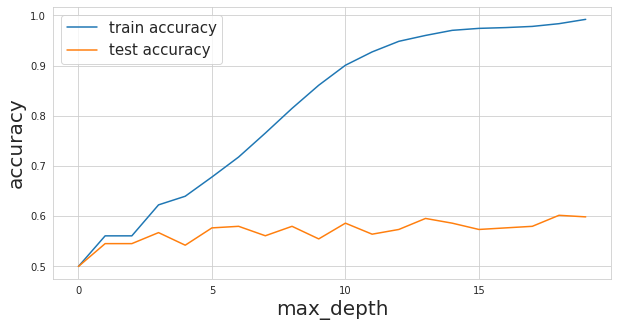

In [30]:
# Taking fold 4 as test set and rest as training set
check_stratified(fold = 4)

In [31]:
X = pd.read_csv('./st_fold.csv')
y = X.quality.values
X = X.drop('quality', axis = 1).values
clf = tree.DecisionTreeClassifier(max_depth = 25)
scores = model_selection.cross_val_score(clf, X, y, cv=5)
print(scores)

[0.615625   0.6        0.6125     0.628125   0.58934169]


In [32]:
# Calculating the average
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.03)


You can see from above graph visualisation and the accuracy score that stratified k-Fold Cross Validation produced much better result than the k-Fold Cross Validation technique of model validation.

Thus whenever there is an uneven distribution of targets choose stratified k-Fold Cross Valit=datin instead of simple k-Fold Cross Validation.

## Any suggestions will be great for me to learn